# Pymaceuticals Inc.
---

### Observations and Insights
- *Your observations and insights here* ...


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df=pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
len(combined_df['Mouse ID'].value_counts())


# combined_cleaned_df['Mouse ID'].value_counts().count()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
filtered= combined_df.duplicated(['Mouse ID','Timepoint'])
combined_df.loc[filtered]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
filtered=combined_df.loc[:,'Mouse ID']=='g989'
combined_df.loc[filtered]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
filtered=combined_df.loc[:,'Mouse ID']!='g989'
combined_cleaned_df=combined_df.loc[filtered]
combined_cleaned_df

# combined_cleaned_df.loc[combined_cleaned_df['Mouse ID']=="g989"]

# combined_cleaned_df.loc[combined_cleaned_df['Mouse ID']=="g989"].count()
# filter generates boolean series

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
len(combined_cleaned_df['Mouse ID'].value_counts())


248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


grouped_df=combined_cleaned_df.groupby('Drug Regimen')



tumor_vol=grouped_df['Tumor Volume (mm3)']

tumor_mean=tumor_vol.mean()
tumor_median=tumor_vol.median()
tumor_variance=tumor_vol.var()
tumor_std=tumor_vol.std()
tumor_sem=tumor_vol.sem()

# orrrr not creating variable
# tumor_mean = grouped_df['Tumor Volume (mm3)'].mean()
# tumor_median = grouped_df['Tumor Volume (mm3)'].median()
# tumor_stdev = grouped_df['Tumor Volume (mm3)'].std()
# tumor_sem = grouped_df['Tumor Volume (mm3)'].sem()


summary_stats=pd.DataFrame({'Tumor Mean': tumor_mean,
                           'Tumor Median': tumor_median,
                           'Tumor Variance': tumor_variance,
                           'Tumor STD': tumor_std,
                           'Tumor SEM': tumor_sem
                           })

summary_stats

,Tumor Mean,Tumor Median,Tumor Variance,Tumor STD,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and 
# SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


summary={"Tumor Volume (mm3)": ['mean','median', 'var', 'std','sem']}

summary_aggregate=grouped_df.agg(summary)

summary_aggregate



# summary_aggregate=combined_cleaned_df.groupby('Drug Regimen')


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

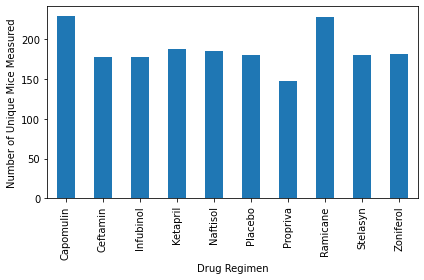

In [10]:
# Generate a bar plot showing the total number of measurements 
# taken on each drug regimen using pandas.


count=grouped_df['Mouse ID'].count()


# bar_plot = grouped_df['Drug Regimen'].value_counts().plot.bar(width=0.7, zorder=3)


countbar= count.plot(kind="bar")
# ^^^all that is needed, above: 2 codes to create the bar plot w/ pandas

countbar.set_xlabel('Drug Regimen')
countbar.set_ylabel('Number of Unique Mice Measured')
# show it
plt.tight_layout()
plt.show()

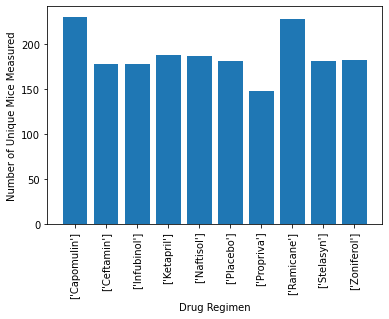

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot.

# 
# Set x axis and tick locations
# x-axis has to be one value for every item in bar chart
x_axis = np.arange(len(grouped_df['Drug Regimen']))
# x_axis

plt.bar(x_axis,count, align="center")

tick_locations = [value for value in x_axis]
# tick_locations

plt.xticks(tick_locations, grouped_df['Drug Regimen'].unique(), rotation="vertical")


plt.xlabel('Drug Regimen')
plt.ylabel('Number of Unique Mice Measured')


plt.show()

# # plt.bar(x_axis, users, color='c', alpha=.75, align="center")

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

grouped_gender= combined_cleaned_df.groupby('Sex')

count_gen=grouped_gender['Sex'].count()

count_df=pd.DataFrame({'Gender Count': count_gen})
# count_df

In [13]:
grouped_gender
count_gen
count_df

,Gender Count
Sex,
Female,922
Male,958


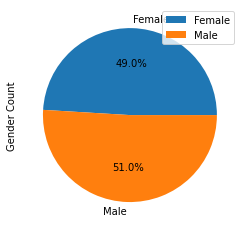

In [14]:
gender_pie = count_df.plot(kind="pie", y='Gender Count', autopct= '%1.1f%%')

plt.show()

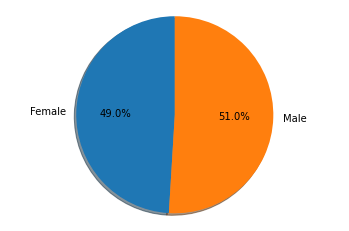

In [15]:
plt.pie(count_gen, labels=count_gen.index.values, autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')  

# Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin



# Start by getting the last (greatest) timepoint for each mouse

maxtp=combined_cleaned_df.groupby('Mouse ID')['Timepoint'].max()
maxtp

maxdf=pd.DataFrame({'Timepoint':maxtp})
maxdf


# # Merge this df with original df to get the tumor volume at the last timepoint
merged_df=pd.merge(combined_cleaned_df,maxdf, on=['Mouse ID','Timepoint'], how='inner')
merged_df

# groupedmice=merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drugname in treatment_list:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tv=merged_df.loc[merged_df['Drug Regimen']==drugname, 'Tumor Volume (mm3)']
    tumor_vol_list.append(tv)
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
    
    quartiles = tv.quantile([.25,.5,.75])
    
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drugname}: {iqr}')
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drugname}: {lower_bound}')
    print(f'Upper Bound for {drugname}: {upper_bound}')
    
    # Quantitatively check for outliers
    outliers_count = tv.loc[(tv>= upper_bound) | (tv <= lower_bound)]
    print(f'Number of {drugname} outliers: {outliers_count}')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


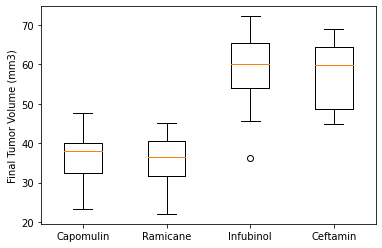

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_list,labels=treatment_list)
plt.show()

## Line and Scatter Plots

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



Text(0.5, 1.0, 'Capomulin Treatment of Mouse x401')

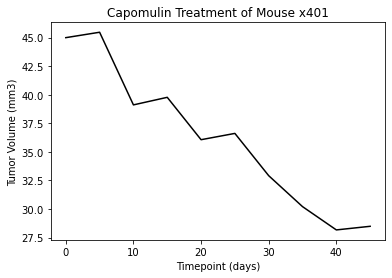

In [20]:
mouse=combined_cleaned_df.loc[combined_cleaned_df['Mouse ID']=='x401']
mouse
plt.plot(mouse['Timepoint'],mouse['Tumor Volume (mm3)'], color='k')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse x401')

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



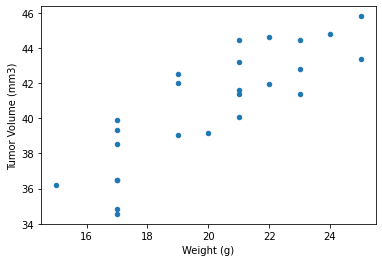

In [22]:
capo= combined_cleaned_df.loc[combined_cleaned_df['Drug Regimen']=="Capomulin"]
capo


weight= capo.groupby(['Mouse ID'])
# weight

avgtumor=weight.mean()
avgtumor


avgtumor.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)")
plt.show()

# # Tells matplotlib that we want to make a scatter plot
# # The size of each point on our plot is determined by their x value
# plt.scatter(, data, marker="o", facecolors="red", edgecolors="black",
#             s=x_axis, alpha=0.79)

## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen



In [24]:
capo

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


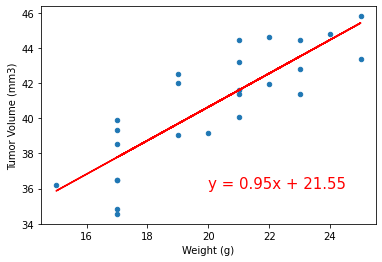

In [31]:


x_values = avgtumor['Weight (g)']
y_values = avgtumor['Tumor Volume (mm3)']
avgtumor.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)")
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
# plt.xlabel('Normalized Blood Pressure')
# plt.ylabel('1Y_Disease_Progress')
# print(f"The r-squared is: {rvalue**2}")
plt.show()




In [ ]:
Observation one comes from the line graph of the Capomulin treatment
of Mouse x401 we can see that the treatment for the mouse has reduced 
significantly in size over the span of 40 days. This tells us that the 
treatment is effective in helping to reduce the size of tumor levels,
measured in mm3(cubic millimeter). 

Observation 2 comes from the scatter plot which tells us that the weight
of the mouse has a correlation with the weight of the tumor, that is to
say that the higher the weight of the mouse the more likely the bigger
the tumor and vice versa, although there are some exceptions. 

Observation 3 comes from looking at the pie plot and seeing that the pie chart
was created using gender, and therefor the result shows there was a close 
50/50 between the gender. In total there was 51% male mice and 49% we female mice. 